# TW3 Exploratory Data Analysis

#### Bart Nadala, Maason Kao, Zachary Jeffreys
#### 10/10/2021

#### Submission:

- Push the completed code to your Github repository.

- See more information in Canvas. 

## Part 0: 
    
The following Git repository is for the COVID-19 visual dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering: 

https://github.com/CSSEGISandData/COVID-19

- Read the information on the dashboard and check the datasets details

- Datasets are located in a folder: csse_covid_19_data

We will walk through the code and see how Python Pandas functions are used to process the data. 


##### The example below is COVID19 cases in the US. 

- We download two files but they seem the same. Let's use the file for confirmed cases. 

In [5]:
# Download the data from the Web

import os
datapath = os.path.join("csse_covid_19_data", "csse_covid_19_data", "")

import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
os.makedirs(datapath, exist_ok=True)

for filename in ("time_series_covid19_confirmed_US.csv","time_series_covid19_deaths_US.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "csse_covid_19_data/csse_covid_19_data/" + filename
    urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath + filename)

In [6]:
# import necessary packages and modules

%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

### Read data

In [7]:
# read data
df = pd.read_csv(datapath + "time_series_covid19_confirmed_US.csv")
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,9744,9761,9777,9780,9790,9799,9810,9826,9839,9843
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,36447,36491,36542,36579,36602,36697,36734,36780,36814,36870
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,3490,3495,3512,3519,3521,3524,3527,3536,3541,3545
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,4131,4146,4153,4157,4163,4167,4168,4176,4184,4192
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,9818,9842,9860,9870,9878,9923,9941,9957,9970,9998


#### We select data for two states, Washington and Texas

- If you want to select different states, modify this cell and rerun it. 

In [8]:
# Select the data for Washington and Texas
st1 = df.loc[df["Province_State"] == "Washington"]
st2 = df.loc[df["Province_State"] == "Texas"]

# drop not-used columns 
drop_cols = ['UID', 'iso2', 'iso3', 'FIPS', 'Province_State', 'Country_Region', 
             'Lat', 'Long_', 'code3', 'Combined_Key', 'Admin2']

st1 = st1.drop(columns=drop_cols)
st2 = st2.drop(columns=drop_cols)

print(st1.head())
print(st2.head())

st1.columns

      1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
3145        0        0        0        0        0        0        0        0   
3146        0        0        0        0        0        0        0        0   
3147        0        0        0        0        0        0        0        0   
3148        0        0        0        0        0        0        0        0   
3149        0        0        0        0        0        0        0        0   

      1/30/20  1/31/20  ...  9/30/21  10/1/21  10/2/21  10/3/21  10/4/21  \
3145        0        0  ...     3023     3043     3043     3043     3073   
3146        0        0  ...     2518     2539     2539     2539     2574   
3147        0        0  ...    29192    29328    29328    29328    29594   
3148        0        0  ...    10089    10131    10131    10131    10230   
3149        0        0  ...     4122     4173     4173     4173     4247   

      10/5/21  10/6/21  10/7/21  10/8/21  10/9/21  
3145     3

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/30/21', '10/1/21', '10/2/21', '10/3/21', '10/4/21', '10/5/21',
       '10/6/21', '10/7/21', '10/8/21', '10/9/21'],
      dtype='object', length=627)

### sum() function

- see the examples:
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html

In [9]:
# sum of column data of rows 
# columns and rows will be changed
# sum() function returns a Series
cases_st1 = st1.sum(axis=0)
cases_st2 = st2.sum(axis=0)

print(cases_st1.tail())
print(cases_st2.tail())

10/5/21    670207
10/6/21    672782
10/7/21    675695
10/8/21    677995
10/9/21    677995
dtype: int64
10/5/21    4105397
10/6/21    4116410
10/7/21    4124391
10/8/21    4128119
10/9/21    4129189
dtype: int64


In [10]:
# createa a DataFrame of two states' data
dict_states = {'WA_cases': cases_st1, 'TX_cases': cases_st2}

data = pd.DataFrame(dict_states)

print(data.head())
print(data.tail())

         WA_cases  TX_cases
1/22/20         1         0
1/23/20         1         0
1/24/20         1         0
1/25/20         1         0
1/26/20         1         0
         WA_cases  TX_cases
10/5/21    670207   4105397
10/6/21    672782   4116410
10/7/21    675695   4124391
10/8/21    677995   4128119
10/9/21    677995   4129189


In [11]:
# reset index (0, 1, 2, . . . ) --> adding number index
data.reset_index(inplace=True)

data.head()

,index,WA_cases,TX_cases
0,1/22/20,1,0
1,1/23/20,1,0
2,1/24/20,1,0
3,1/25/20,1,0
4,1/26/20,1,0


In [12]:
# add two new columns and set default values

data['WA_daily'] = 0
data['TX_daily'] = 0

data.head()

,index,WA_cases,TX_cases,WA_daily,TX_daily
0,1/22/20,1,0,0,0
1,1/23/20,1,0,0,0
2,1/24/20,1,0,0,0
3,1/25/20,1,0,0,0
4,1/26/20,1,0,0,0


In [13]:
# calculate daily cases and assign the values

for index, row in data.iterrows():
    if index==0:
        data.loc[index, 'WA_daily'] = data.loc[index, 'WA_cases'] 
        data.loc[index, 'TX_daily'] = data.loc[index, 'TX_cases'] 
    else:
        data.loc[index, 'WA_daily'] = data.loc[index, 'WA_cases'] - data.loc[index-1, 'WA_cases'] 
        data.loc[index, 'TX_daily'] = data.loc[index, 'TX_cases'] - data.loc[index-1, 'TX_cases'] 

    # data clearning (drop error values)
    if data.loc[index, 'WA_daily'] < 0:
        data.loc[index, 'WA_daily'] = 0
    if data.loc[index, 'TX_daily'] < 0:
        data.loc[index, 'TX_daily'] = 0

data.tail()

,index,WA_cases,TX_cases,WA_daily,TX_daily
622,10/5/21,670207,4105397,2373,12257
623,10/6/21,672782,4116410,2575,11013
624,10/7/21,675695,4124391,2913,7981
625,10/8/21,677995,4128119,2300,3728
626,10/9/21,677995,4129189,0,1070


In [14]:
# add a new column for the number of days
data['day_number'] = data.index

data.head()

,index,WA_cases,TX_cases,WA_daily,TX_daily,day_number
0,1/22/20,1,0,1,0,0
1,1/23/20,1,0,0,0,1
2,1/24/20,1,0,0,0,2
3,1/25/20,1,0,0,0,3
4,1/26/20,1,0,0,0,4


## Part 1

### Tasks

1. (Optional) Select states you are interested in from the COVID-19 data repository. The above cells contain the data for Washington and Texas. Hence if you would like to change states, you will update the above cells and rerun them. 

2. Conduct exploratory data analysis on the selected data and visualize the data. This may include the following:

(1) Descriptive statistics: mean, median and standard deviation, mininum, maximum and quatiles.

(2) Draw boxplots.

(3) Draw histograms.

(4) Draw scatter plots and calculate correlation coefficient factor r
    
    - Given an explanatory variable x (e.g., day_number), you display a response variable y (e.g., TX_cases). 


(5) Choose one tool that has not be used here and apply it on these COVID-19 data. 

#### Task (1)

In [15]:
data.describe()

,WA_cases,TX_cases,WA_daily,TX_daily,day_number
count,627.000000,6.270000e+02,627.000000,627.000000,627.000000
mean,228188.105263,1.594144e+06,1081.393939,6585.628389,313.000000
std,201934.730563,1.349198e+06,1418.237720,6954.203267,181.143589
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,31594.000000,1.434625e+05,212.500000,1324.500000,156.500000
50%,171962.000000,1.291458e+06,629.000000,4352.000000,313.000000
75%,410504.000000,2.907719e+06,1428.000000,9285.000000,469.500000
max,677995.000000,4.129189e+06,11204.000000,40882.000000,626.000000


#### Task (2)

<AxesSubplot:>

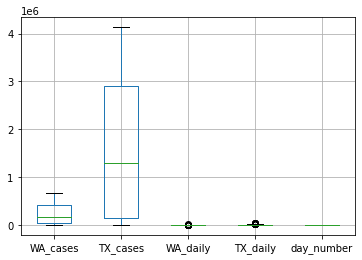

In [16]:
data.boxplot()

#### Task (3)

array([[<AxesSubplot:title={'center':'WA_cases'}>,
        <AxesSubplot:title={'center':'TX_cases'}>],
       [<AxesSubplot:title={'center':'WA_daily'}>,
        <AxesSubplot:title={'center':'TX_daily'}>],
       [<AxesSubplot:title={'center':'day_number'}>, <AxesSubplot:>]],
      dtype=object)

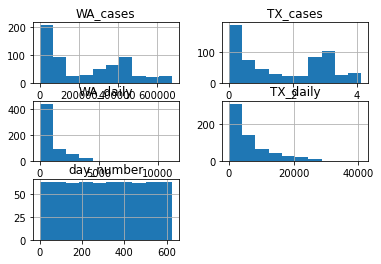

In [17]:
data.hist()

#### Task (4)

<AxesSubplot:xlabel='TX_cases', ylabel='TX_daily'>

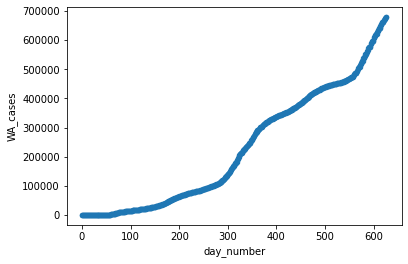

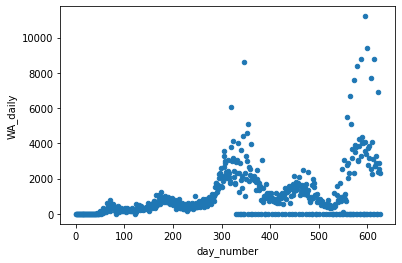

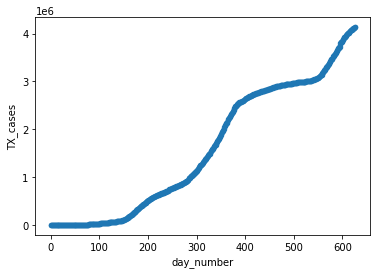

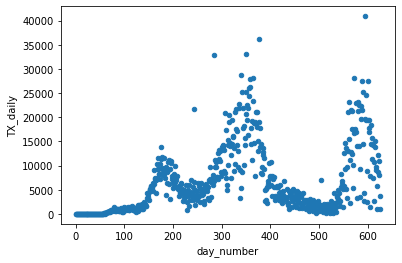

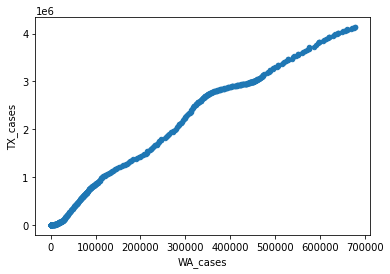

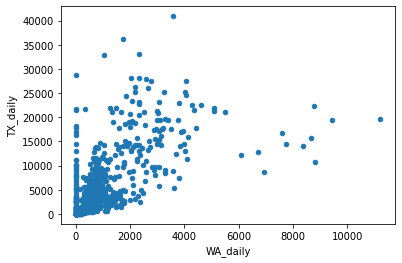

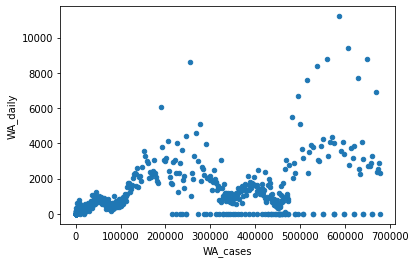

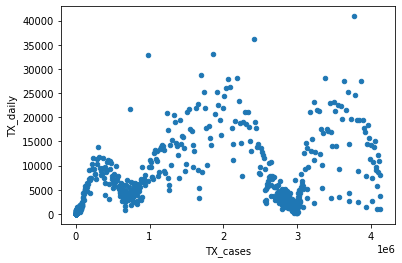

In [22]:
data.plot.scatter(x="day_number", y="WA_cases")
data.plot.scatter(x="day_number", y="WA_daily")
data.plot.scatter(x="day_number", y="TX_cases")
data.plot.scatter(x="day_number", y="TX_daily")
data.plot.scatter(x="WA_cases", y="TX_cases")
data.plot.scatter(x="WA_daily", y="TX_daily")
data.plot.scatter(x="WA_cases", y="WA_daily")
data.plot.scatter(x="TX_cases", y="TX_daily")

#### Task (5)

<AxesSubplot:>

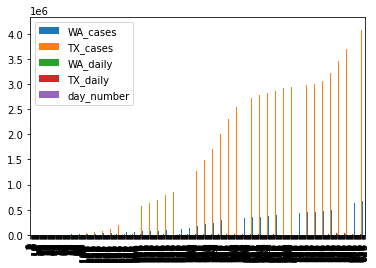

In [23]:
data.plot.bar()

## Part 2

Write a summary of what you find from the data analysis. 

In [26]:
print("From this data, in comparing Washington and Texas cases, the most significant find is that there is a significantly larger number of cases in Texas compared to Washington irrespective to the number of day. As the days increase, so to does the cases for both states while Texas leads at a seemingly exponential rate in comparison.")

From this data, in comparing Washington and Texas cases, the most significant find is that there is a significantly larger number of cases in Texas compared to Washington irrespective to the number of day. As the days increase, so to does the cases for both states while Texas leads at a seemingly exponential rate in comparison.


### Resources

#### Boxplot
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51


- matplotlib.pyplot boxplot demo
https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html


#### matplotlib.pyplot
- scatter plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html


- histogram plot
https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.hist.html


#### pandas DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html


- describe()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


- corr()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html


- hist()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html


- plot.scatter()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html


- pivot()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html